# 幂次变换
## 原理回顾
幂次变换的函数形式为$$g(x,y)=C\times[f(x,y)]^{\gamma}$$
当$\gamma > 1$时，图像的高灰度值区域会被拉伸，图像整体变亮，对比度增强；

当$0 < \gamma < 1$时，图像的低灰度值区域会被拉伸，图像整体变暗，对比度降低，有助于突出图像暗部细节；

当$\gamma < 0$时，图像的灰度值会发生反转，实现类似负片的效果。

例如，若有一张室内照片，整体有些偏暗，高灰度值区域（比如窗户等较亮部分）的细节不太明显，当设置$\gamma = 1.5$（$C = 1.0$）进行幂次变换后，照片中较亮部分的细节会被拉伸，整体图像变亮，对比度增强，窗户等区域的纹理等细节能看得更清楚。

而如果设置$\gamma = 0.5$（$C = 1.0$），则低灰度值区域会被拉伸，图像整体会变暗些，暗部（比如室内的一些阴影角落）的细节会更突出一些。

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def power_transform(image, C=1.0, gamma=1.0):
    """
    对输入图像进行幂次变换
    :param image: 输入的图像（以灰度图形式，numpy数组表示）
    :param C: 幂次变换的常数，默认值为1.0
    :param gamma: 幂次，默认值为1.0
    :return: 幂次变换后的图像（numpy数组表示）
    """
    # 获取图像的高度和宽度
    height, width = image.shape[:2]
    t_image = [[0 for _ in range(width)] for _ in range(height)]
    # 对图像的每个像素点进行幂次变换
    for y in range(height):
        for x in range(width):
            pixel_value = image[y][ x]
            # 根据幂次变换公式进行计算
            new_value = C * (pixel_value ** gamma)
            # 将计算结果限制在0-255范围内（假设输出图像也是8位灰度图），并转换为整数类型
            new_value = np.clip(new_value, 0, 255).astype(np.uint8)
            t_image[y][ x] = new_value
    return t_image

## 代码解释
- **`power_transform`函数**：
    - 该函数接受三个参数，`image`是输入的灰度图像，以二维的`numpy`数组形式传入（通过`cv2.imread`以灰度图模式读取图像得到的就是这种格式），`C`是幂次变换的常数，默认值为`1.0`，`gamma`是幂次，默认值也为`1.0`。
    - 在函数内部，首先通过`image.shape[:2]`获取图像的高度和宽度，方便后续遍历每个像素点。
    - 接着使用嵌套的`for`循环遍历图像的每一行（`y`）和每一列（`x`），获取每个像素点的当前灰度值`pixel_value`，按照幂次变换公式\(g(x,y)=C\times[f(x,y)]^{\gamma}\)进行计算，得到新的灰度值`new_value`。
    - 由于计算得到的`new_value`可能超出图像像素值的有效范围（0 - 255），并且可能是浮点数，所以使用`np.clip`函数将其限制在0 - 255范围内，再通过`astype(np.uint8)`将其转换为8位无符号整数类型（符合图像像素值的常见数据类型要求），最后把更新后的像素值放回原图像对应的位置，完成整个图像的幂次变换并返回变换后的图像。

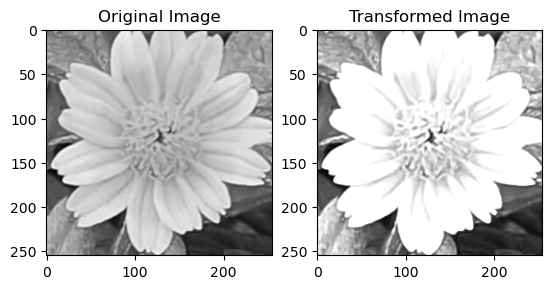

In [3]:
# 读取图像（以灰度图模式读取）
image = cv2.imread('flower.jpg', 0)

# 进行幂次变换示例（可根据实际情况调整参数）
transformed_image = power_transform(image, C=0.1, gamma=1.5)

# 使用matplotlib在Jupyter Notebook中显示原始图像和变换后的图像
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(transformed_image, cmap='gray')
plt.title('Transformed Image')

plt.show()

可以看到，图片经过幂次变换后整体变亮，曝光度变高，适合对更暗一些的图片进行处理，能够看清暗部的细节。